###Week 4 Discussion Google Colab Created by Ali Hatamizadeh 




*Load* an image


The size of this image is : (512, 512, 3)


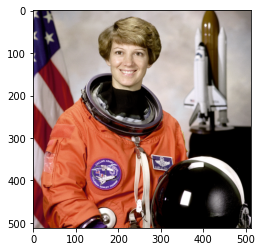

In [0]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import astronaut

img=astronaut()

plt.figure()
plt.imshow(img)

print('The size of this image is : {}'.format(np.shape(img)))

Convert the image to Grayscale using:

$$L = R * 0.2989 + G * 0.5870 + B * 0.1140$$

(https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5445596)

Where $R,G,B$ represent the red (first), green (second) and blue (third) channels. 


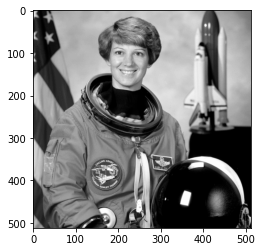

(512, 512)


In [0]:
def rgb2gray(img):

  R=img[:,:,0]
  G=img[:,:,1]
  B=img[:,:,2]

  L=R*0.2989 + G* 0.5870 + B*0.1140

  return L

img_gray=rgb2gray(img)
plt.figure()
plt.imshow(img_gray,cmap='gray')
plt.show()
print(np.shape(img_gray))

Implementing 2D Convolution (from scratch)

---

If $x$ representes an image and $h$ a kernel of size $2k+1\times2k+1$, a convolution operation can be defined as   


$$y[m,n]=\sum_{j=-k}^{k} \sum_{i=-k}^{k} x[i,j] h[m-i,n-j]$$

Implement a function that takes an input image and filter as its input arguments and returns a convolved image. 

It is assumed that this function performs a convolution with stride of one and "same" zero padding. 

 

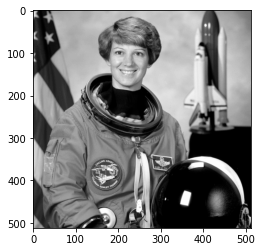

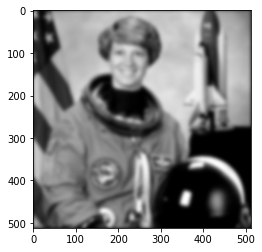

(512, 512)


In [0]:
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel

def CONV_2D(image,kernel):
  k_h,k_w=np.shape(kernel)
  h,w=np.shape(image)

  p_y=int((k_h-1)/2)
  p_x=int((k_w-1)/2)

  padded_img=np.zeros([h+k_h-1,w+k_w-1])
  padded_img[p_y:p_y+h,p_x:p_x+w] = image

  output=np.zeros([h,w])
  kernel=np.flip(kernel)

  for y in range(h):
    for x in range(w):
      image_local_window=padded_img[y:y+k_h,x:x+k_w]
      output[y,x]=np.sum(np.multiply(kernel,image_local_window))

  return output 

Gaussian_kernel_size=21
Gaussian_kernel= Gaussian2DKernel(x_stddev=4,y_stddev=4,x_size=Gaussian_kernel_size,y_size=Gaussian_kernel_size)

filtered_img=CONV_2D(img_gray,Gaussian_kernel)

plt.figure()
plt.imshow(img_gray,cmap='gray')
plt.show()

plt.figure()
plt.imshow(filtered_img,cmap='gray')
plt.show()

print(np.shape(filtered_img))

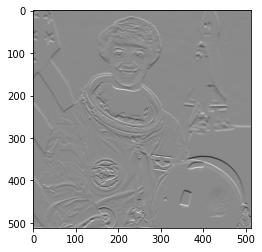

In [0]:
filter_y=np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)

filtered_img_y=CONV_2D(img_gray,filter_y)

plt.figure()
plt.imshow(filtered_img_y,cmap='gray')
plt.show()

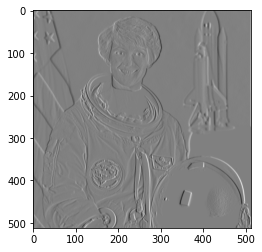

In [0]:
filter_x=np.array([[-1,0,1],[-1,0,1],[-1,0,1]],np.float32)

filtered_img_x=CONV_2D(img_gray,filter_x)

plt.figure()
plt.imshow(filtered_img_x,cmap='gray')
plt.show()